## Linear Regression

In this notebook, we will use the package `scikit-learn` to perform linear regression. The first step is to load the data we will use into a format suitable for training a linear regression model.

## Loading Datasets

We read external files into a `DataFrame`, a spreadsheet-like object provided by the `Pandas` package, used for handling tabular data. The code below reads the airfare data from an earlier lesson from this week.

In [1]:
import io
import pandas as pd
fare_data = pd.read_csv('linreg_airfare_univariate.csv')

We can view the first five rows of the data frame using the `.head()` method shown below.

In [2]:
fare_data.head()

,Distance,Fare
0,314,291
1,454,390
2,578,406
3,656,332
4,822,475


## Training a Univariate Linear Regression Model in `scikit-learn`

Before training a linear regression model using the package `scikit-learn`, we need to separate our training data into features - which in this case is just `Distance`, and outcomes - which in this case are the airfares. We will then use this data to train a model to predict airfares from distance.

In [3]:
#seperate data into features and outcomes
X_train = fare_data[['Distance']]
y_train = fare_data[['Fare']]

We are now ready to train our model. We first initialize a linear model by instantiating the `LinearRegression` class, and we store this model in the variable `linear_reg_model1`. We then train this model on our data `X_train` and `y_train` by calling the method `.fit()`. This estimates linear model parameters $\theta_0$ (the model intercept) and $\theta_1$ (the slope).   

In [4]:
#train create and train model
from sklearn.linear_model import LinearRegression

linear_reg_model1 = LinearRegression()
linear_reg_model1.fit(X_train, y_train)

LinearRegression()

We can now extract the estimates for these parameters from the trained model using `.intercept_` and `.coef_` as shown below.

In [5]:
#examine coefficients 
theta0 = linear_reg_model1.intercept_ #extract intercept
theta1 = linear_reg_model1.coef_[0] # extract slope
print("fitted slope theta1=%s, fitted intercept theta0=%s" % (theta1, theta0))

fitted slope theta1=[0.27251417], fitted intercept theta0=[238.12663522]


It is useful to visually check the fit of our model by plotting it against the raw data. We can do this using the Python package `matplotlib`. After importing the relevant packages, the first part of the code below plots the raw data as blue points using the function `scatter`. The second part of the code generates distance values from 250 to 2000, plugs these values into the linear regression formula $y = \theta_0 + \theta_1*x$ to get fare predictions, and then plots the resulting values on the same plot.

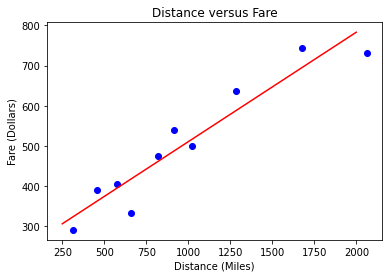

In [6]:
#load plotting library and numerical library
import matplotlib.pyplot as plt
import numpy as np

#plot raw data
plt.scatter(x=fare_data['Distance'], y=fare_data['Fare'],color="blue")
plt.title('Distance versus Fare')
plt.xlabel('Distance (Miles)')
plt.ylabel('Fare (Dollars)')
#plot linear fit
new_x = np.arange(start=250,stop=2000,step=1)
new_y = theta0+theta1*new_x
plt.plot(new_x,new_y,color="red")
plt.show()

We could compute further predictions by carrying out calculations substituting the `theta0` and `theta1` values from above into $y = \theta_0 + \theta_1 x$, but the scikit-learn package provides an easy method, `.predict()`, to simplify this.

In [7]:
#create new Data Frame with new distances
fare_prediction_df = pd.DataFrame({"Distance":[300,400,500]})
#make predictions
predictions = linear_reg_model1.predict(fare_prediction_df[['Distance']])
#add predictions to Data Frame 
fare_prediction_df['Fare'] = predictions
print(fare_prediction_df)

   Distance        Fare
0       300  319.880887
1       400  347.132305
2       500  374.383722


## Multivariate Linear Regression in scikit-learn

Training a regression using more than one feature is an easy extension of the univariate training process. This time we use the airline market size data discussed in an earlier lesson from this week, loading and viewing it using the same process as above.

In [8]:
marketsize_data = pd.read_csv('linreg_marketsize_multivariate.csv')
marketsize_data.head()

,Distance,OriginPop,DestinationPop,MarketSize
0,1070.9,7.2,7.1,6.4
1,984.7,7.0,7.9,8.1
2,2041.4,11.7,11.5,8.1
3,1677.8,11.6,11.9,5.7
4,1160.7,10.0,8.9,10.6


The training process looks essentially the same, but we extract multiple features into our `X_train` variable, and extract multiple feature values from `.coef_`. It is useful to package these values with the feature names in a table for viewing, as is done below.

In [9]:
#train linear regression model 
X_train = marketsize_data[['Distance','OriginPop','DestinationPop']]
y_train = marketsize_data.MarketSize
linear_reg_model2 = LinearRegression()
linear_reg_model2.fit(X_train, y_train)

#examine theta coefficients
print(pd.DataFrame({"Feature": ['Distance','OriginPop','DestinationPop'],
                   "Coefficient":linear_reg_model2.coef_}))

          Feature  Coefficient
0        Distance    -0.007378
1       OriginPop     0.773902
2  DestinationPop     0.602583


We can also view some diagnostic metrics from this model. Below we look at two, mean absolute error, the average absolute difference between predicted and true market sizes, and mean squared error, which we saw in this week's lessons: the average squared difference between predicted and true market sizes.

Mean absolute error gives an intuitive idea of the difference between model predictions and reality. Recall that mean squared error is the quantity that is minimized by our trained linear regression model.

In [10]:
#examine training error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, linear_reg_model2.predict(X_train)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, linear_reg_model2.predict(X_train)))

Mean Absolute Error: 1.1592083587194015
Mean Squared Error: 2.226235078752185


## Feature Selection

We will now look at feature selection using linear regression models. To demonstrate this, suppose that at some time in the past, we had only a part of our airfare dataset. To replicate this situation, we will divide the original dataset into two parts: `old_fare_data`, containing this older airfare data that we will train our models on, and `new_fare_data`, containing new fare data points we haven't seen before. These are separated using the `Pandas` library's `.iloc` method for indexing.

In [11]:
old_fare_data = fare_data.iloc[[1,3,5,7,9],:].copy()
new_fare_data = fare_data.iloc[[0,2,4,6,8],:].copy()

We now create a function which will fit a linear model based on the old fare data, plot the old data points in blue, the new data points in green, and print the mean squared error of the trained model on the plot.

In [12]:
#load plotting library and numerical library
import matplotlib.pyplot as plt
import numpy as np


def fit_and_plot(X_train,y_train,old_fare_data,new_fare_data): 
  #train create and train model  
  model = LinearRegression()
  model.fit(X_train, y_train)

  #plot old raw data
  plt.scatter(x=old_fare_data['Distance'], y=old_fare_data['Fare'])
  plt.title('Distance versus Fare, MSE = %s' %  round(metrics.mean_squared_error(y_train, model.predict(X_train)),2))
  plt.xlabel('Distance (Miles)')
  plt.ylabel('Fare (Dollars)')

  #plot new raw data
  plt.scatter(x=new_fare_data['Distance'], y=new_fare_data['Fare'],color="green")  
  
  return model

Next, we will pass our data to this function, and then add to the plot our fitted linear model as done before. Notice that the linear model fit on the old fare appears to fit both the blue and green points reasonable well.

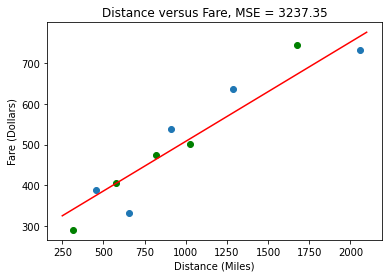

In [13]:
#simple linear fit from before
X_train = old_fare_data[['Distance']]
y_train = old_fare_data.Fare

#train create and train model, plot raw data
model = fit_and_plot(X_train,y_train,old_fare_data,new_fare_data)

#plot linear fit
new_x = np.arange(start=250,stop=2100,step=1)
new_y = model.intercept_ + model.coef_[0]*new_x 
plt.plot(new_x,new_y,color="red")
plt.show()

Now, we will add a squared version of distance to the training data in the first part of this code, retrain the model, and compute a curve using our new quadratic coefficients.

Notice that the curve seems to fits the old blue and new green data points even better than the model with only the linear term, and the mean squared error (MSE) has decreased.

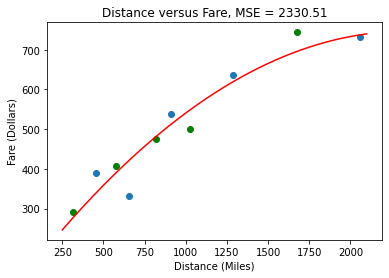

In [14]:
#quadratic fit
old_fare_data['Distance^2'] = old_fare_data['Distance']**2

X_train = old_fare_data[['Distance','Distance^2']]
y_train = old_fare_data.Fare

#train create and train model, plot raw data
model = fit_and_plot(X_train,y_train,old_fare_data,new_fare_data)

#plot quadratic fit
new_x = np.arange(start=250,stop=2100,step=1)
new_y = model.intercept_ + model.coef_[0]*new_x + model.coef_[1]*new_x**2
plt.plot(new_x,new_y,color="red")
plt.show()

Rerunning now with a cubic term, the model appears to fit even better with a lower MSE, but there is something odd: the curve unintuitively suggests that prices will start to decrease with high distance.

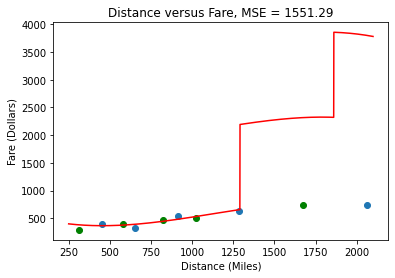

In [15]:
#cubic fit
old_fare_data['Distance^3'] = old_fare_data['Distance']**3

X_train = old_fare_data[['Distance','Distance^2','Distance^3']]
y_train = old_fare_data.Fare

#train create and train model, plot raw data
model = fit_and_plot(X_train,y_train,old_fare_data,new_fare_data)

#plot cubic fit
new_x = np.arange(start=250,stop=2100,step=1)
new_y = model.intercept_ + model.coef_[0]*new_x + model.coef_[1]*new_x**2 + model.coef_[2]*new_x**3 
plt.plot(new_x,new_y,color="red")
plt.show()

With a quartic fit, we start seeing some more significant problems. MSE has actually been reduced to zero: the curve goes through every single blue training point perfectly. However, the curve's predictions for several new green points, especially the right most one, are very incorrect.

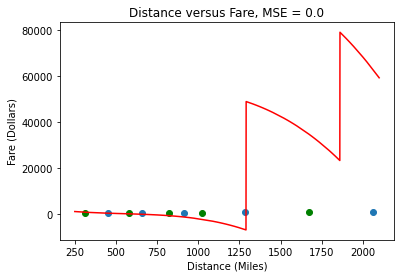

In [16]:
#quartic fit
old_fare_data['Distance^4'] = old_fare_data['Distance']**4

X_train = old_fare_data[['Distance','Distance^2','Distance^3','Distance^4']]
y_train = old_fare_data.Fare

#train create and train model, plot raw data
model = fit_and_plot(X_train,y_train,old_fare_data,new_fare_data)

#plot quartic fit
new_x = np.arange(start=250,stop=2100,step=1)
new_y = model.intercept_ + model.coef_[0]*new_x + model.coef_[1]*new_x**2 + model.coef_[2]*new_x**3 + model.coef_[3]*new_x**4  
plt.plot(new_x,new_y,color="red")
plt.show()

What happened here? As we kept adding polynomial features, the model fit to the training data better and better, and eventually perfectly. But with higher order polynomials, the curve wildly oscillated to capture every training point, and so generalized less well to new data. It appears that the quadratic model offers the best compromise, with lower MSE than the linear model, but good generalization to new data points.